In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM, RNN
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
import time
from datetime import timezone
from datetime import datetime


In [2]:
from tensorflow.compat.v1.keras.backend import get_session
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Data Prep

In [4]:
dataset = pd.read_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_2.pkl')
dataset

,quantity,driver_id,g_distance,turns,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,travel_time
0,19,533.0,11,16,1,1,1,1,42.650000
1,11,533.0,21,12,1,43,1,1,27.250000
2,2,533.0,45,17,2,11,1,1,50.366667
3,25,533.0,5,11,3,1,1,1,21.266667
4,2,533.0,29,14,3,22,1,1,29.583333
...,...,...,...,...,...,...,...,...,...
37108,22,15347.0,11,18,0,50,2,4,55.600000
37109,1,415.0,63,14,2,54,2,4,286.966667
37110,1,433.0,55,16,4,15,2,4,207.250000
37111,1,713.0,58,14,5,5,2,4,164.750000


In [5]:
cleaned_dataset = dataset[dataset.travel_time <= 2*dataset.g_distance]

In [6]:
cleaned_dataset

,quantity,driver_id,g_distance,turns,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,travel_time
1,11,533.0,21,12,1,43,1,1,27.250000
2,2,533.0,45,17,2,11,1,1,50.366667
4,2,533.0,29,14,3,22,1,1,29.583333
5,8,533.0,21,17,3,52,1,1,15.616667
7,19,533.0,24,14,4,21,1,1,22.350000
...,...,...,...,...,...,...,...,...,...
37099,2,420.0,103,24,4,52,1,4,184.516667
37100,50,555.0,52,13,6,55,1,4,88.516667
37104,1,14753.0,194,19,5,33,1,4,385.716667
37105,1,15347.0,56,21,23,14,1,4,88.150000


In [7]:
data, target = cleaned_dataset.drop(['travel_time'],1), cleaned_dataset['travel_time']

In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

def data_preprocesing(data,target,data_len):

  scaler = MinMaxScaler()

  data.iloc[:,0:] = scaler.fit_transform(data.iloc[:,0:].to_numpy())

  X = data
  y = target

  data_x = np.array(X, dtype=float)
  data_x = data_x.reshape((data_len,8,1))

  target = np.array(y, dtype=float)
  # target = target.reshape(169113,1,1)

  return data_x, target

In [11]:
X, y = data_preprocesing(data,target,15186)

In [12]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)

# Model Training

In [ ]:
# model = Sequential()  
# model.add(LSTM(17, input_shape=(1, 100),return_sequences=True))
# model.add(Dense(100))
# model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
# model.fit(data, target, epochs=1000, batch_size=1, verbose=2,validation_data=(x_test, y_test))

In [13]:
# callback = callbacks.EarlyStopping(monitor='val_loss', patience = 3)

model = Sequential()  
model.add(Bidirectional(LSTM(64, input_shape=(8, 1),return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64))
# model.add(Dense(64))
model.add(Dense(1, activation= "linear"))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy','mse'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

ValueError: ignored

In [15]:
tmp = time.time()
# epochs=50
# learning_rate = 0.1
# decay_rate = learning_rate / epochs
# momentum = 0.8

history = model.fit(train_x,train_y,epochs=50,validation_data=(test_x,test_y))
gpu_time = time.time() - tmp
print("GPU Training Time: %s seconds" % (str(gpu_time)))

Train on 12148 samples, validate on 3038 samples
Epoch 1/50
12148/12148 [==============================] - ETA: 0s - loss: 23.9370 - acc: 3.2927e-04 - mean_squared_error: 1542.6829

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


12148/12148 [==============================] - 10s 851us/sample - loss: 23.9370 - acc: 3.2927e-04 - mean_squared_error: 1542.6829 - val_loss: 19.8094 - val_acc: 0.0000e+00 - val_mean_squared_error: 1037.0073
Epoch 2/50
12148/12148 [==============================] - 7s 585us/sample - loss: 18.7386 - acc: 5.7623e-04 - mean_squared_error: 1030.3544 - val_loss: 17.1972 - val_acc: 0.0000e+00 - val_mean_squared_error: 820.6917
Epoch 3/50
12148/12148 [==============================] - 7s 603us/sample - loss: 15.8252 - acc: 6.5854e-04 - mean_squared_error: 775.2578 - val_loss: 15.8479 - val_acc: 0.0000e+00 - val_mean_squared_error: 769.7062
Epoch 4/50
12148/12148 [==============================] - 7s 600us/sample - loss: 14.9922 - acc: 5.7623e-04 - mean_squared_error: 721.3185 - val_loss: 15.1021 - val_acc: 0.0000e+00 - val_mean_squared_error: 737.8154
Epoch 5/50
12148/12148 [==============================] - 7s 599us/sample - loss: 14.8381 - acc: 4.9391e-04 - mean_squared_error: 708.9098 - va

# Save Model

In [16]:
model.save('/content/drive/MyDrive/Thesis/DATASETS/biLSTM/biLSTM_2_layer_NU_2.h5')

# Load Model

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Thesis/DATASETS/LSTM/LSTM_2_layer_NU_2.h5')

In [17]:
prediction = model.predict(test_x)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [18]:
prediction = [i[0] for i in prediction]

In [19]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = prediction

In [ ]:
# pre_ac.plot()

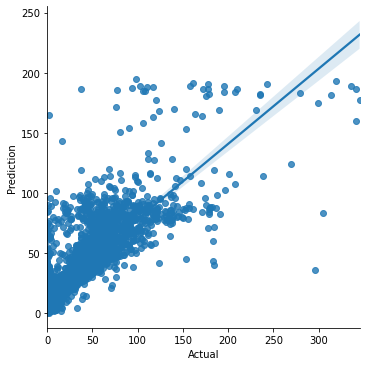

In [20]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac);

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [22]:
mae = mean_absolute_error(test_y, prediction)
errors = abs(prediction - test_y)
# mape = 100 * np.mean(np.abs(errors / test_y))
# accuracy = 100 - mape
MSE = np.square(np.subtract(test_y,prediction)).mean() 
RMSE = math.sqrt(MSE)
R2 = r2_score(test_y,prediction)

In [23]:
print('Model Performance')
print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
print('RMSE: {:0.2f}.'.format(RMSE))
print('R2: {:0.2f}.'.format(R2))
# print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
MAE: 12.5963 minutes.
RMSE: 23.37.
R2: 0.62.


In [24]:
!pip install shap

     |████████████████████████████████| 358kB 6.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=5b613e8880e77dcc983858bb0b98e545ea416fd0d3cb2659188f4248993bc663
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [25]:
import shap

explainer = shap.DeepExplainer(model,train_x[0:10000])
shap_values = explainer.shap_values(test_x[0:10])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


In [26]:
a = np.array([x[0] for x in shap_values[0][0]])

In [27]:
shap_value = np.array([[x[0] for x in shap_values[0][y]] for y in range(0,len(shap_values[0]))])

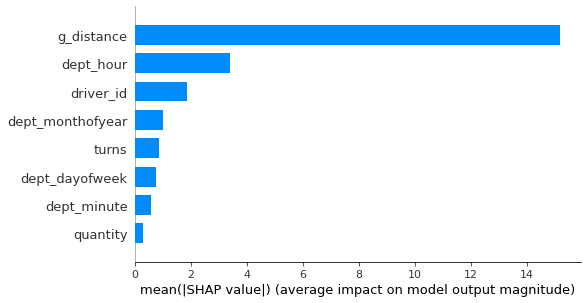

In [28]:
shap.summary_plot(shap_value, train_x, feature_names = data.columns, plot_type="bar")

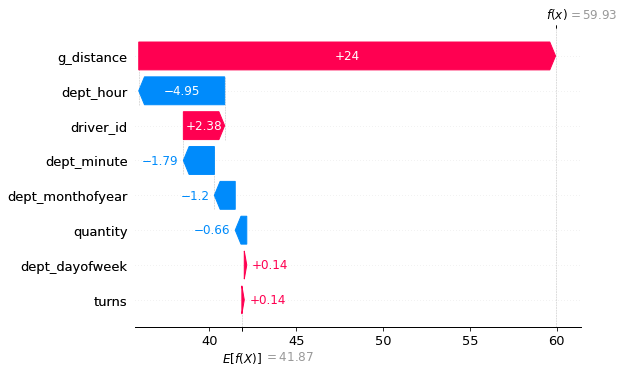

In [30]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''
# load JS visualization code to notebook
shap.initjs()

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], a, feature_names = data.columns, show = True)

In [31]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.force_plot(explainer.expected_value, a, feature_names = data.columns, show = True)